In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
sns.set_theme(
    style="darkgrid",   # soft gray background
    context="notebook"  # good sizing for EDA
)

In [4]:
df = pd.read_csv('../data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
print(df.shape)

(150000, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [16]:
serious_dlq_counts = df['SeriousDlqin2yrs'].value_counts()
serious_dlq_percentage = round((serious_dlq_counts[1] / df['SeriousDlqin2yrs'].count()) * 100, 2)
print(f'Percentage of population with 90+ days of past due delinquency: {serious_dlq_percentage}')

Percentage of population with 90+ days of past due delinquency: 6.68


<Axes: xlabel='utilization_score_range', ylabel='count'>

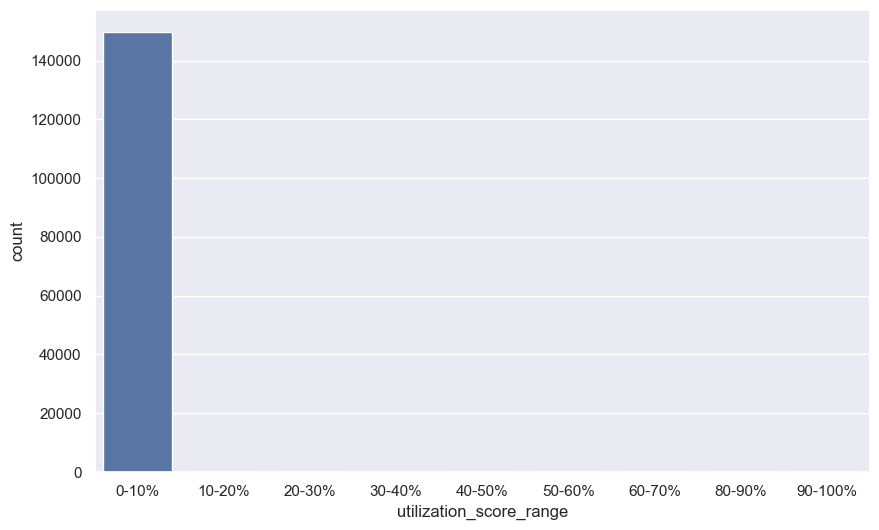

In [76]:
utilization_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
utilization_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '80-90%', '90-100%']
df['utilization_score_range'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], bins = utilization_bins, labels = utilization_labels, include_lowest=True, right=False)

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'utilization_score_range', order = utilization_labels)

In [23]:
utilization_use = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], bins = utilization_bins, labels = utilization_labels, include_lowest=True, right=False)
# print(utilization_use)
print(utilization_use.value_counts())

RevolvingUtilizationOfUnsecuredLines
0-10%      149759
10-20%          7
50-60%          3
80-90%          2
90-100%         2
20-30%          1
40-50%          1
60-70%          1
30-40%          0
Name: count, dtype: int64


<Axes: xlabel='debt_ratio_score_range', ylabel='count'>

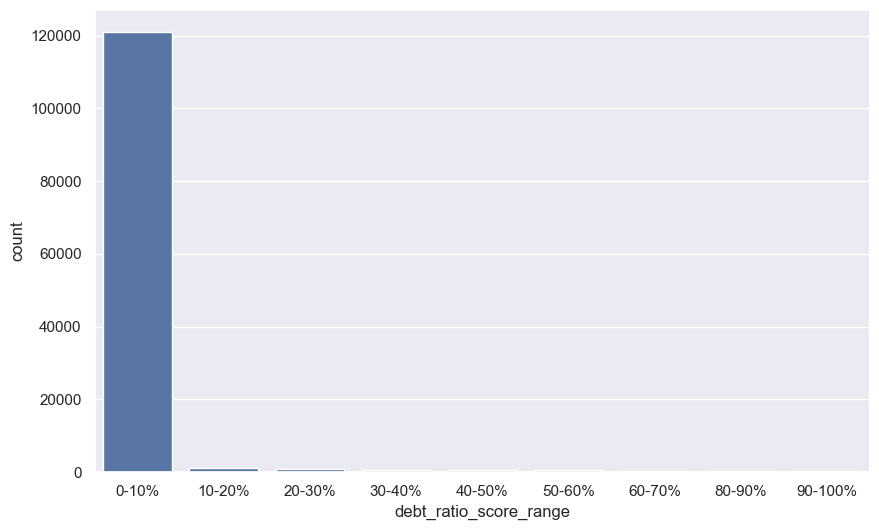

In [77]:
debt_ratio_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
debt_ratio_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '80-90%', '90-100%']
df['debt_ratio_score_range'] = pd.cut(df['DebtRatio'], bins = debt_ratio_bins, labels = debt_ratio_labels, include_lowest=True, right=False)

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'debt_ratio_score_range', order = debt_ratio_labels)

In [25]:
debt_ratio_use = pd.cut(df['DebtRatio'], bins = debt_ratio_bins, labels = debt_ratio_labels, include_lowest=True, right=False)
# print(utilization_use)
print(debt_ratio_use.value_counts())

DebtRatio
0-10%      121006
10-20%       1049
20-30%        808
30-40%        633
40-50%        524
50-60%        417
60-70%        348
80-90%        312
90-100%       265
Name: count, dtype: int64


In [31]:
past_due_30to59_bins = [30, 40, 50, 60]
past_due_30to59_labels = ['30-40 Days', '40-50 Days', '50-60 Days']
df['past_due_30to59_range'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins = past_due_30to59_bins, labels = past_due_30to59_labels, include_lowest=True, right=False)

past_due_30to59_use = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins = past_due_30to59_bins, labels = past_due_30to59_labels, include_lowest=True, right=False)
# print(utilization_use)
print(past_due_30to59_use.value_counts())

NumberOfTime30-59DaysPastDueNotWorse
30-40 Days    0
40-50 Days    0
50-60 Days    0
Name: count, dtype: int64


In [33]:
past_due_60to89_bins = [60, 70, 80, 90]
past_due_60to89_labels = ['60-70 Days', '70-80 Days', '90-90 Days']
df['past_due_60to89_range'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins = past_due_60to89_bins, labels = past_due_60to89_labels, include_lowest=True, right=False)

past_due_60to89_use = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins = past_due_60to89_bins, labels = past_due_60to89_labels, include_lowest=True, right=False)
# print(utilization_use)
print(past_due_60to89_use.value_counts())

NumberOfTime60-89DaysPastDueNotWorse
60-70 Days    0
70-80 Days    0
90-90 Days    0
Name: count, dtype: int64


In [34]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [43]:
non_zero_count_30to59 = (df['NumberOfTime30-59DaysPastDueNotWorse'] != 0).sum()
non_zero_count_60to89 = (df['NumberOfTime60-89DaysPastDueNotWorse'] != 0).sum()
non_zero_count_90 = (df['NumberOfTimes90DaysLate'] != 0).sum()
print(f'Number of customers with a payment... \n 30 to 59 days late: {non_zero_count_30to59} \n 60 to 89 days late: {non_zero_count_60to89} \n 90 days late: {non_zero_count_90}')

Number of customers with a payment... 
 30 to 59 days late: 23982 
 60 to 89 days late: 7604 
 90 days late: 8338


In [45]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
           ... 
16084.0       1
10523.0       1
55250.0       1
9242.0        1
7647.0        1
Name: count, Length: 13594, dtype: int64

(array([1.634e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.050e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

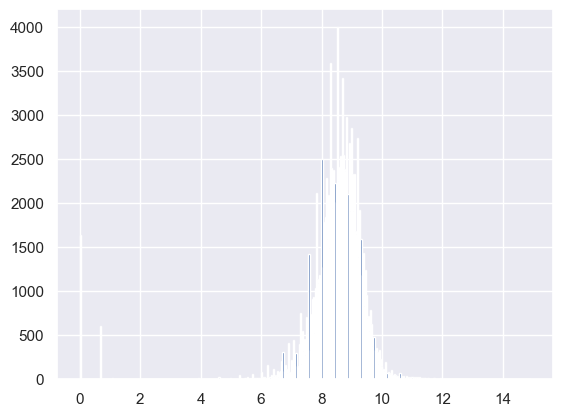

In [78]:
x = df['MonthlyIncome'].dropna()
plt.hist(np.log1p(x), bins = 'fd')

NameError: name 'show_quartiles' is not defined

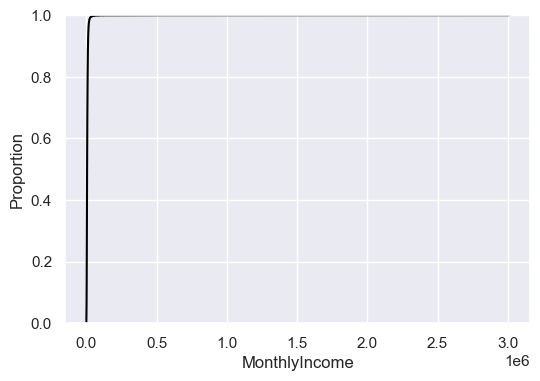

In [91]:
x = df["MonthlyIncome"].dropna().sort_values()
y = np.arange(1, len(x) + 1) / len(x)

q1, q2, q3 = x.quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(6, 4))
plt.plot(x, y, color = "black")

# Q1
plt.axvline(q1,  color="tab:blue", linestyle=":",  alpha=0.7, label="Q1 (25%)")

# Median
plt.axvline(q2,  color="tab:orange", linestyle=":",  alpha=0.7, label="Median (50%)")

# Q3
plt.axvline(q3,  color="tab:green", linestyle=":",  alpha=0.7, label="Q3 (75%)")

plt.xscale("log")
plt.xlabel("Monthly Income (log scale)")
plt.ylabel("Cumulative proportion")
plt.title("ECDF of Monthly Income")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
'''def plot_ecdf(df, column, log_scale=True, show_quartiles=True):
    x = df[column].dropna()

    plt.figure(figsize=(6, 4))
    sns.ecdfplot(x=x, color="black")

    if show_quartiles:
        q1, q2, q3 = x.quantile([0.25, 0.5, 0.75])

        plt.axvline(q1, color="tab:blue",   linestyle=":", alpha=0.7, label="Q1")
        plt.axvline(q2, color="tab:orange", linestyle=":", alpha=0.7, label="Median")
        plt.axvline(q3, color="tab:green",  linestyle=":", alpha=0.7, label="Q3")
        plt.legend()

    if log_scale:
        plt.xscale("log")
        plt.xlabel(f"{column} (log scale)")
    else:
        plt.xlabel(column)

    plt.ylabel("Cumulative proportion")
    plt.title(f"ECDF of {column}")
    sns.despine()
    plt.show()'''


In [5]:
from src.eda import plot_ecdf

In [20]:
y = df['SeriousDlqin2yrs']
y.value_counts(normalize = True)


SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

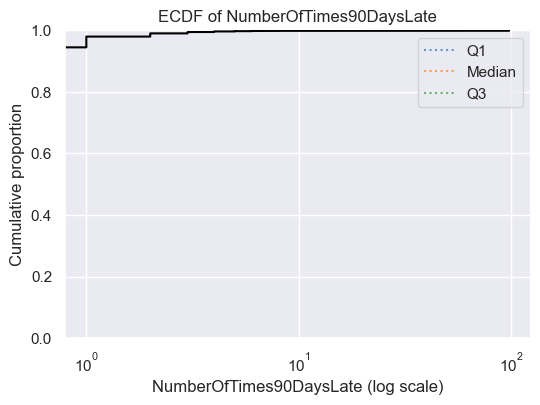

In [55]:
plot_ecdf(df, 'NumberOfTimes90DaysLate', log_scale = True)

In [28]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(normalize = True).sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     0.840120
1     0.106887
2     0.030653
3     0.011693
4     0.004980
5     0.002280
6     0.000933
7     0.000360
8     0.000167
9     0.000080
10    0.000027
11    0.000007
12    0.000013
13    0.000007
96    0.000033
98    0.001760
Name: proportion, dtype: float64

In [35]:
'''df["NumberOfTime30-59DaysPastDueNotWorse"] = df[
    "NumberOfTime30-59DaysPastDueNotWorse"
].replace({96: np.nan, 98: np.nan})

summary = (
    df.groupby("NumberOfTime30-59DaysPastDueNotWorse")
      .agg(
          default_rate=("SeriousDlqin2yrs", "mean"),
          count=("SeriousDlqin2yrs", "size")
      )
)
'''
summary

,default_rate,count
NumberOfTime30-59DaysPastDueNotWorse,,
0.0,0.040002,126018
1.0,0.150253,16033
2.0,0.265115,4598
3.0,0.352338,1754
4.0,0.425703,747
5.0,0.450292,342
6.0,0.528571,140
7.0,0.518519,54
8.0,0.320000,25


In [6]:
df["NumberOfTime30-59DaysPastDueNotWorse"] = df[
    "NumberOfTime30-59DaysPastDueNotWorse"
].replace({96: np.nan, 98: np.nan})

In [7]:
from src.eda import delinquency_summary

In [8]:
delinquency_summary(df, 'NumberOfTime30-59DaysPastDueNotWorse')

,default_rate,count
NumberOfTime30-59DaysPastDueNotWorse,,
0.0,0.040002,126018
1.0,0.150253,16033
2.0,0.265115,4598
3.0,0.352338,1754
4.0,0.425703,747
5.0,0.450292,342
6.0,0.528571,140
7.0,0.518519,54
8.0,0.320000,25


<Axes: title={'center': 'Default rate by number of times 30-59 past due'}, ylabel='Default rate'>

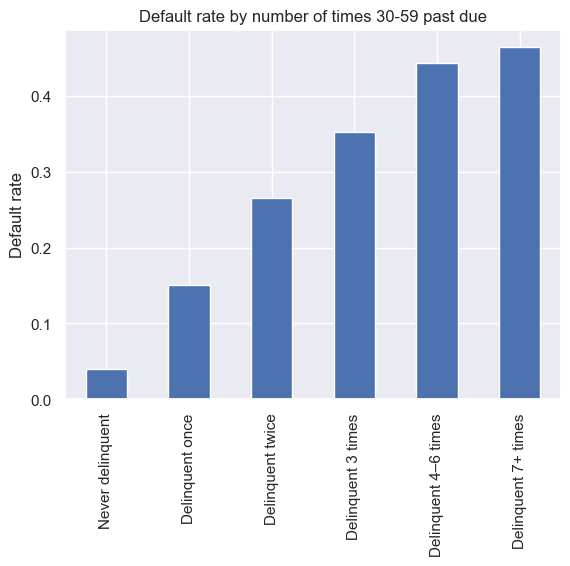

In [45]:
df["delinq_30_59_bin"] = pd.cut(
    df["NumberOfTime30-59DaysPastDueNotWorse"],
    bins = [-1, 0, 1, 2, 3, 6, np.inf],
    labels = [
        "Never delinquent",
        "Delinquent once",
        "Delinquent twice",
        "Delinquent 3 times",
        "Delinquent 4–6 times",
        "Delinquent 7+ times"
    ]
)
df.groupby("delinq_30_59_bin")["SeriousDlqin2yrs"].mean().plot(kind="bar", title = 'Default rate by number of times 30-59 past due', ylabel = 'Default rate', xlabel = '')

In [9]:
from src.eda import plot_default_rate_by_count

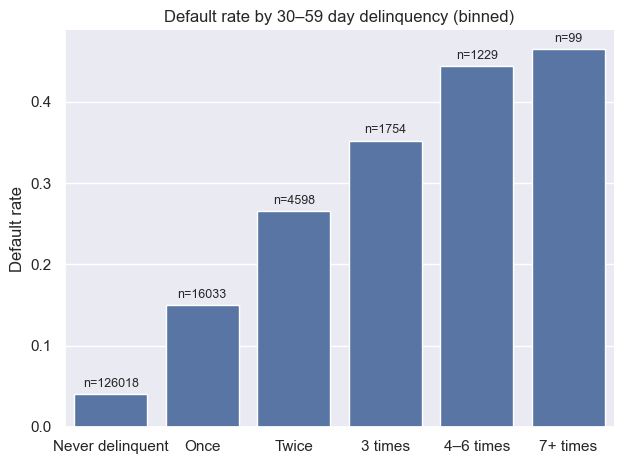

In [10]:
bins = [-1, 0, 1, 2, 3, 6, np.inf]
labels = [
    "Never delinquent",
    "Once",
    "Twice",
    "3 times",
    "4–6 times",
    "7+ times"
]

plot_default_rate_by_count(
    df,
    "NumberOfTime30-59DaysPastDueNotWorse",
    bins=bins,
    labels=labels,
    title="Default rate by 30–59 day delinquency (binned)"
)

In [11]:
df["NumberOfTimes90DaysLate"] = df[
    "NumberOfTimes90DaysLate"
].replace({96: np.nan, 98: np.nan})
delinquency_summary(df, 'NumberOfTimes90DaysLate')

,default_rate,count
NumberOfTimes90DaysLate,,
0.0,0.046265,141662
1.0,0.336639,5243
2.0,0.499035,1555
3.0,0.577211,667
4.0,0.670103,291
5.0,0.633588,131
6.0,0.600000,80
7.0,0.815789,38
8.0,0.714286,21


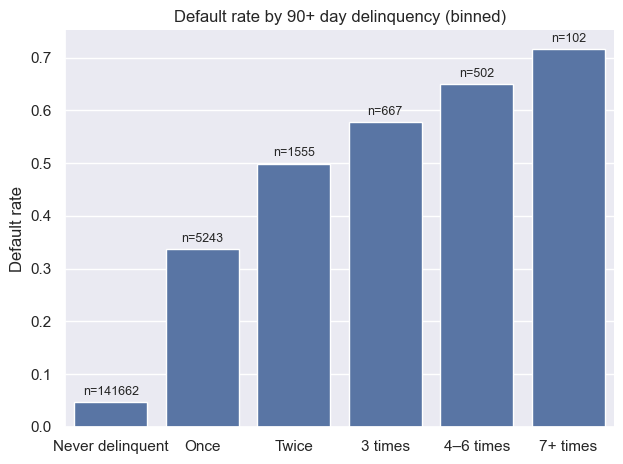

In [12]:
bins = [-1, 0, 1, 2, 3, 6, np.inf]
labels = [
    "Never delinquent",
    "Once",
    "Twice",
    "3 times",
    "4–6 times",
    "7+ times"
]

plot_default_rate_by_count(
    df,
    "NumberOfTimes90DaysLate",
    bins=bins,
    labels=labels,
    title="Default rate by 90+ day delinquency (binned)"
)

In [13]:
df["NumberOfTime60-89DaysPastDueNotWorse"] = df[
    "NumberOfTime60-89DaysPastDueNotWorse"
].replace({96: np.nan, 98: np.nan})
delinquency_summary(df, 'NumberOfTime60-89DaysPastDueNotWorse')

,default_rate,count
NumberOfTime60-89DaysPastDueNotWorse,,
0.0,0.050956,142396
1.0,0.310068,5731
2.0,0.501789,1118
3.0,0.566038,318
4.0,0.619048,105
5.0,0.617647,34
6.0,0.750000,16
7.0,0.555556,9
8.0,0.500000,2


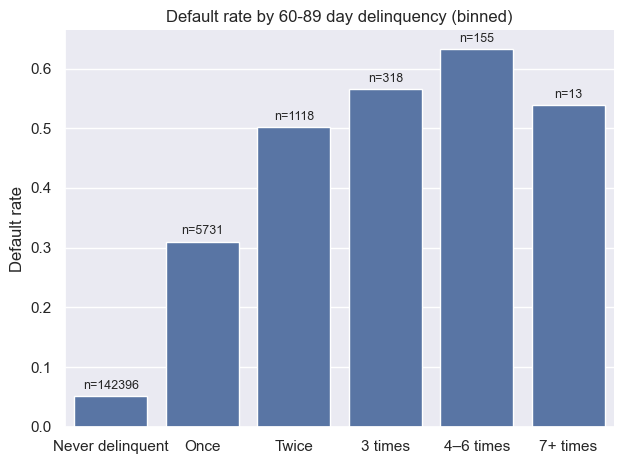

In [15]:
bins = [-1, 0, 1, 2, 3, 6, np.inf]
labels = [
    "Never delinquent",
    "Once",
    "Twice",
    "3 times",
    "4–6 times",
    "7+ times"
]

plot_default_rate_by_count(
    df,
    "NumberOfTime60-89DaysPastDueNotWorse",
    bins=bins,
    labels=labels,
    title="Default rate by 60-89 day delinquency (binned)"
)

In [56]:
df["NumberOfTimes90DaysLate"].value_counts(normalize = True).sort_index()

NumberOfTimes90DaysLate
0     0.944413
1     0.034953
2     0.010367
3     0.004447
4     0.001940
5     0.000873
6     0.000533
7     0.000253
8     0.000140
9     0.000127
10    0.000053
11    0.000033
12    0.000013
13    0.000027
14    0.000013
15    0.000013
17    0.000007
96    0.000033
98    0.001760
Name: proportion, dtype: float64